# Forest Fire Burn Area Prediction - CS345 Final Project

### - Kyle Cummings & Mike Peyton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import ElasticNet


In [2]:
data = pd.read_csv("fires.csv", sep = ",") #Read In Values

Y = np.array(data[['area']].values)
X = data[data.columns[:-1]]

**Feature Correlation Values:**

In [3]:
dataCorr = np.array(data.corr()[['area']].values) #Get Area Correlation Values 
featureCorr = dataCorr[:,0][:-1] #Remove Area to Area Correlation (Always 1)
features = ['X','Y','month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

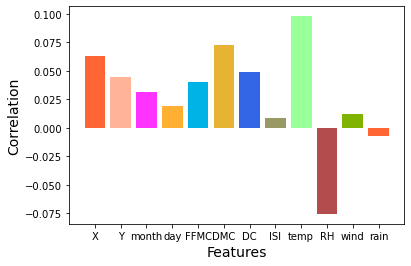

In [4]:
plt.bar(features, featureCorr, color = ['#FF6633', '#FFB399', '#FF33FF', '#FFAF32', '#00B3E6',  '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D','#80B300'])
plt.ylabel('Correlation', size = 14)
plt.xlabel('Features', size = 14)
plt.show()

**Below, we analyze the mean of the correlation coefficient arrays to see which dataset will give better correlation**

In [5]:
#Remove Features With Lowest Correlation Coefficient 
featureCorr = np.abs(featureCorr)
coef_improved = np.array(featureCorr)
coef_improved = np.delete(featureCorr,11)
coef_improved = np.delete(featureCorr,10)
coef_improved = np.delete(featureCorr,7)
coef_improved = np.delete(featureCorr,3)

In [6]:
print('Mean Correlation w/o removal:', np.mean(featureCorr))
print('Mean Correlation w/ removal:',np.mean(coef_improved))

Mean Correlation w/o removal: 0.04350259434725603
Mean Correlation w/ removal: 0.04573775696608803


**Fitting the regression with degree 1 on the original dataset**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state = 2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [8]:
np.mean(np.abs(y_pred-y_test)) #Error calculation

19.27078786187161

**Fitting the regression with degree 1 on the improved dataset**

In [9]:
new_X = np.array(X)
new_X = np.delete(new_X, 11, 1)
new_X = np.delete(new_X, 10, 1)
new_X = np.delete(new_X, 7, 1)
new_X = np.delete(new_X, 3, 1)

X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=.3, random_state=2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [10]:
print('Intercept', linreg.intercept_)
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

Intercept [20.38152609]
19.616353885999512


**Elastic Net Regression**

In [11]:
new_X = np.array(X)
Y = (Y - np.mean(Y)) / np.std(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state = 2)

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [12]:
print('Intercept', regr.intercept_)
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

Intercept [0.00995592]
0.3148835475394102


In [13]:
Y_data = np.array(data[['RH']].values)

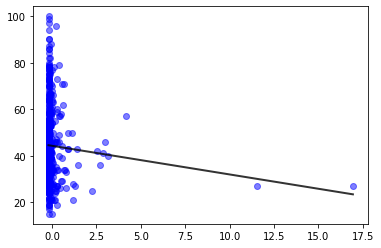

In [14]:
linreg = LinearRegression()
Y = (Y - np.mean(Y)) / np.std(Y)
linreg.fit(Y, Y_data)
y_pred = linreg.predict(Y)
plt.scatter(Y, Y_data,  color='blue', alpha=0.5, label = 'data')
plt.plot(Y, y_pred, color='black', alpha=0.8,linewidth=2, label = 'model')
plt.show()